## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_data = pd.read_csv('ab_data.csv')

b. Use the below cell to find the number of rows in the dataset.

In [3]:
len(ab_data)

294478

c. The number of unique users in the dataset.

In [4]:
len(ab_data['user_id'].unique())

290584

d. The proportion of users converted.

In [5]:
(ab_data['converted']==1).value_counts()
(1 - (259241/(35237+259241)))*100

11.965919355605514

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
ab_data.groupby(['landing_page', 'group']).count()['user_id']

landing_page  group    
new_page      control        1928
              treatment    145311
old_page      control      145274
              treatment      1965
Name: user_id, dtype: int64

In [7]:
ab_data.groupby(['landing_page', 'group']).count()['user_id'][0] + ab_data.groupby(['landing_page', 'group']).count()['user_id'][3]

3893

In [8]:
ab_data.groupby(['landing_page', 'group']).count()

user_id  timestamp  converted
landing_page group                                   
new_page     control       1928       1928       1928
             treatment   145311     145311     145311
old_page     control     145274     145274     145274
             treatment     1965       1965       1965

f. Do any of the rows have missing values?

In [9]:
ab_data.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
#remove bad treatment rows
ab_data.drop(ab_data.query("group == 'treatment' and landing_page == 'old_page'").index, inplace=True)
#remove bad control rows
ab_data.drop(ab_data.query("group == 'control' and landing_page == 'new_page'").index, inplace=True)

In [11]:
ab_data.groupby(['landing_page', 'group']).count()['user_id']
#used for sanity check

landing_page  group    
new_page      treatment    145311
old_page      control      145274
Name: user_id, dtype: int64

In [12]:
df2 = ab_data
#assign new df name to the one with the removed rows

In [13]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [14]:
len(df2['user_id'].unique())

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
#df2['user_id'].duplicated(keep=False)
df2[df2.duplicated(['user_id'], keep=False)]['user_id']
#the first value of this output is the non-unique user_id

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [16]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
len(df2['user_id'])
# get length of df before the duplicate row is removed

290585

In [18]:
df2.drop(df2.index[1889], inplace=True)

In [19]:
len(df2['user_id'])
# get length of df after the duplicate row is removed

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [20]:
df2['converted'].mean()
# percent of individuals

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [21]:
control_grp = df2.groupby(['group'])
control_grp.describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787846.192396  91161.309987  630000.0  708748.25  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

#### As shown in the table above, the probability that an individual converted given that they were in the control group is 0.120386. 

c. Given that an individual was in the `treatment` group, what is the probability they converted?

#### From the same table created in the above segment (b), the probability that an individual converted given that they were in the treatment group is 0.118808. 

d. What is the probability that an individual received the new page?

In [22]:
(df2['landing_page']=='new_page').mean()

0.50006194422266881

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**By the results in the previous sections, I believe that it doesn't matter which page the user is given to begin with, or there is not enough analysis complete yet. This is due to the fact that given an individual converted regardless of page, started off with the old_page, or were given the new_page to start, the probability of conversion was basically the same, or at least within 1 percentage difference. I guess the only thing I can note is that the old_page performed only slightly better than the new page.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**If my Hypothesis is: p_old >= p_new

Then, the Null Hypothesis should be: p_old < p_new**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2['converted'].mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [25]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

d. What is $n_{old}$?

In [26]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.binomial(n_new, p_new)

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.binomial(n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
(new_page_converted / n_new) - (old_page_converted / n_old)

-0.0003119584712912571

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [31]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diffs.append((new_page_converted / n_new) - (old_page_converted / n_old))

In [32]:
p_diffs

[-0.0005526710521486372,
 0.000810006366655458,
 0.0015876302789376295,
 0.00017014031232504,
 -0.0007936599032542235,
 -0.0013787628655613088,
 0.00034202427267766844,
 0.0003488276643974775,
 -0.00026377536726848727,
 -0.00011208841058749086,
 -0.0016333465625032184,
 6.65511910716704e-05,
 0.00014908380121451958,
 0.0006244388811275925,
 0.0011955274761103057,
 0.0019526900520759616,
 -4.334846942166681e-05,
 -0.001344264992085703,
 -0.0004427270519858223,
 -0.00029807712297529043,
 0.0001287827698568389,
 0.001684269346487563,
 -0.00022923656486721622,
 0.0012642435420694986,
 -0.0008349714006810754,
 0.0021385747367777125,
 -0.0002977837990080501,
 0.00033537606980099666,
 -0.0006008115218738147,
 0.0008721373284983625,
 0.0019044421439209092,
 -0.0003600051455617953,
 0.00204177536426893,
 0.001326074358457538,
 0.0007136708553041743,
 0.00013557422397332541,
 0.0005832262952710915,
 5.298192581390526e-05,
 0.0004382881584090309,
 0.0014295560412810465,
 -0.00036027288895050524,


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([    7.,    78.,   439.,  1450.,  2825.,  2905.,  1635.,   579.,
           73.,     9.]),
 array([ -4.80621363e-03,  -3.85504766e-03,  -2.90388170e-03,
         -1.95271573e-03,  -1.00154976e-03,  -5.03837917e-05,
          9.00782176e-04,   1.85194814e-03,   2.80311411e-03,
          3.75428008e-03,   4.70544605e-03]),
 <a list of 10 Patch objects>)

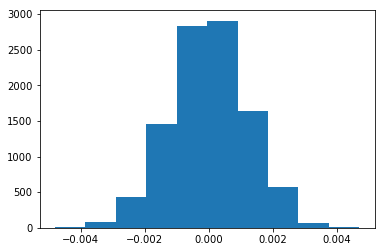

In [33]:
plt.hist(p_diffs)

#### This is a plot I would expect. Since the convert rates were the same, and the number of samples were only slightly different, I would expect the distribution to be centered around 0. This is because you're calculating the differences of the probability so they should remain close to 0 when you subtract from one another.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [34]:
actual = df2.query('group == "treatment"')['converted'].mean() - df2.query('group == "control"')['converted'].mean()
actual

-0.0015782389853555567

In [36]:
#(actual < p_diffs).mean()
(actual < np.array(p_diffs)).mean()

0.90529999999999999

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The value we computed above is called a p-value. The p-value helps determine the significance of your results. A small p-value means you would accept the null hypothesis, a large p-value means you would reject the null hypothesis. In our case, it is a large, strong p-value and it means we would accept our null hypothesis. In other words for our case, this p-value indicates that the our null hypothesis(p_old < p_new) will be accepted meaning the old pages perform better than the new pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

/Users/asenden/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [40]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The z-score and p-value computed above confirm that we can reject the null hypothesis. The z-score tells us the number of standard deviations away from the mean a data point is and it needs to lie within the critical value of -1.95 and 1.95 since our error rate was 5%. The p-value also remains high meaning there is weak evidence against the null hypothesis. Therefore, it agrees with the previous findings- the old pages perform better than the new pages.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [44]:
df2['intercept'] = 1

In [66]:
df2[['control','treatment']] = pd.get_dummies(df2['group'])

In [67]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [48]:
logit = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

In [49]:
results = logit.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [50]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 May 2018   Pseudo R-squ.:               8.077e-06
Time:                        11:36:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Our p-value associated with the ab_page is 0.190. In our regression model, we made the hypotheses a 2 sided test. This means the null hypothesis was p_new NOT EQUAL to p_old. In part II, the hypotheses were a one-sided test. This is why we are seeing a difference in the p-values.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

In [51]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


**We could also consider the timestamp as an effect to whether or not the user will convert. Based on what time the user is browsing at, this might make them more apt to convert than other times of the day. It might be a good idea to consider other outside factors for determining the rate of conversion because otherwise you might miss a more determining factor that has an effect on this rate. This also might bring you some disadvantages when dealing with and trying to compute the conversion rates though as it will make having to model it much more complex and harder to interpret the results.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [52]:
countries = pd.read_csv('countries.csv')
countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [53]:
merged = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
merged.head()

,country,timestamp,group,landing_page,converted,intercept,new_page,old_page,ab_page
user_id,,,,,,,,,
630000,US,2017-01-19 06:26:06.548941,treatment,new_page,0,1,1,0,1
630001,US,2017-01-16 03:16:42.560309,treatment,new_page,1,1,1,0,1
630002,US,2017-01-19 19:20:56.438330,control,old_page,0,1,0,1,0
630003,US,2017-01-12 10:09:31.510471,treatment,new_page,0,1,1,0,1
630004,US,2017-01-18 20:23:58.824994,treatment,new_page,0,1,1,0,1


In [55]:
merged['country'].value_counts()
#see what countries are in the df

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [58]:
#create dummy variables
merged[['US', 'UK']] = pd.get_dummies(merged['country'])[['US', 'UK']]
merged['intercept'] = 1

In [65]:
country_grp = merged.groupby(['country', 'converted']).count()['timestamp']
country_grp

country  converted
CA       0             12827
         1              1672
UK       0             63727
         1              8739
US       0            179277
         1             24342
Name: timestamp, dtype: int64

**It appears that the country the user is from does not have an impact on the conversion rate.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
new_logit = sm.Logit(merged['converted'], merged[['intercept', 'US', 'UK']])

In [60]:
new_results = new_logit.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [61]:
new_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 16 May 2018   Pseudo R-squ.:               1.521e-05
Time:                        12:16:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  This is the final project in Term 1.  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [68]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0